##  Introduction to Data Visualization with Altair

Notebook to accompany article on PB Python.
http://pbpython.com/altair-intro.html

In [1]:
import pandas as pd
from altair import Chart, X, Y, Axis, SortField

In [2]:
%matplotlib inline

Read in the sample CSV file containing the MN 2014 capital budget

In [3]:
budget = pd.read_csv("https://github.com/chris1610/pbpython/raw/master/data/mn-budget-detail-2014.csv")

In [4]:
budget.head()

,category,detail,amount
0,UNIVERSITY OF MINNESOTA,Higher Education Asset Preservation (HEAPR) 1,42500000
1,UNIVERSITY OF MINNESOTA,Minneapolis; Tate Laboratory Renovation,56700000
2,UNIVERSITY OF MINNESOTA,Crookston; Wellness Center,10000000
3,UNIVERSITY OF MINNESOTA,Research Laboratories,8667000
4,UNIVERSITY OF MINNESOTA,Duluth; Chemical Sciences and Advanced Materia...,1500000


Make a basic plot of the top 10 expenditures using the default pandas plotting functions

In [5]:
budget_top_10 = budget.sort_values(by='amount',ascending=False)[:10]

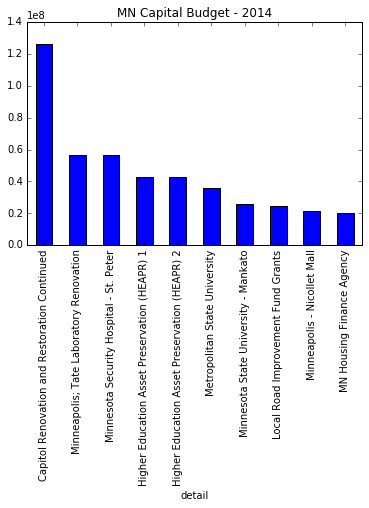

In [6]:
budget_top_10.plot(kind="bar",x=budget_top_10["detail"],
                   title="MN Capital Budget - 2014",
                   legend=False)

Build a similar plot in Altair

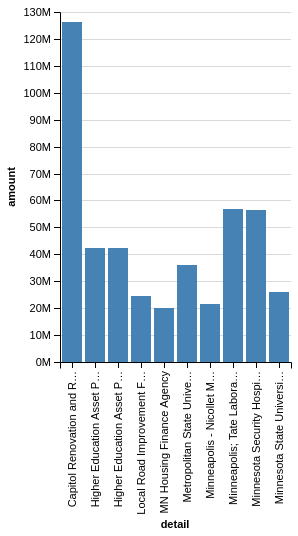

In [7]:
c = Chart(budget_top_10).mark_bar().encode(
    x='detail',
    y='amount')
c

Convert to a horizontal bar graph

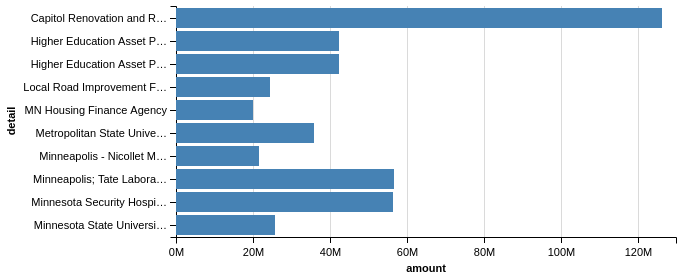

In [8]:
c = Chart(budget_top_10).mark_bar().encode(
    y='detail',
    x='amount')
c

Look at the dictionary containing the JSON spec

In [9]:
c.to_dict(data=False)

{'encoding': {'x': {'field': 'amount', 'type': 'quantitative'},
  'y': {'field': 'detail', 'type': 'nominal'}},
 'mark': 'bar'}

Use X() and Y() - does nothing in this example but is useful for future steps

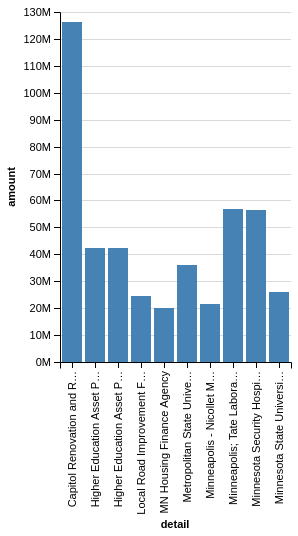

In [10]:
Chart(budget_top_10).mark_bar().encode(
    x=X('detail'),
    y=Y('amount')
)

Add in color codes based on the category. This automatically includes a legend.

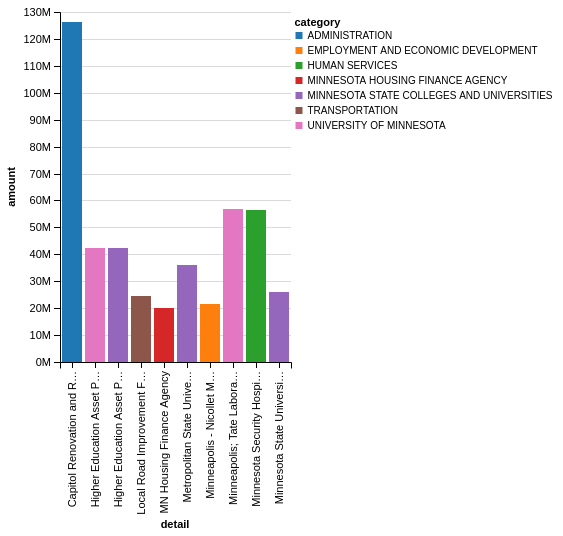

In [11]:
Chart(budget_top_10).mark_bar().encode(
    x=X('detail'),
    y=Y('amount'),
    color="category"
)

Show what happens if we run on all data, not just the top 10

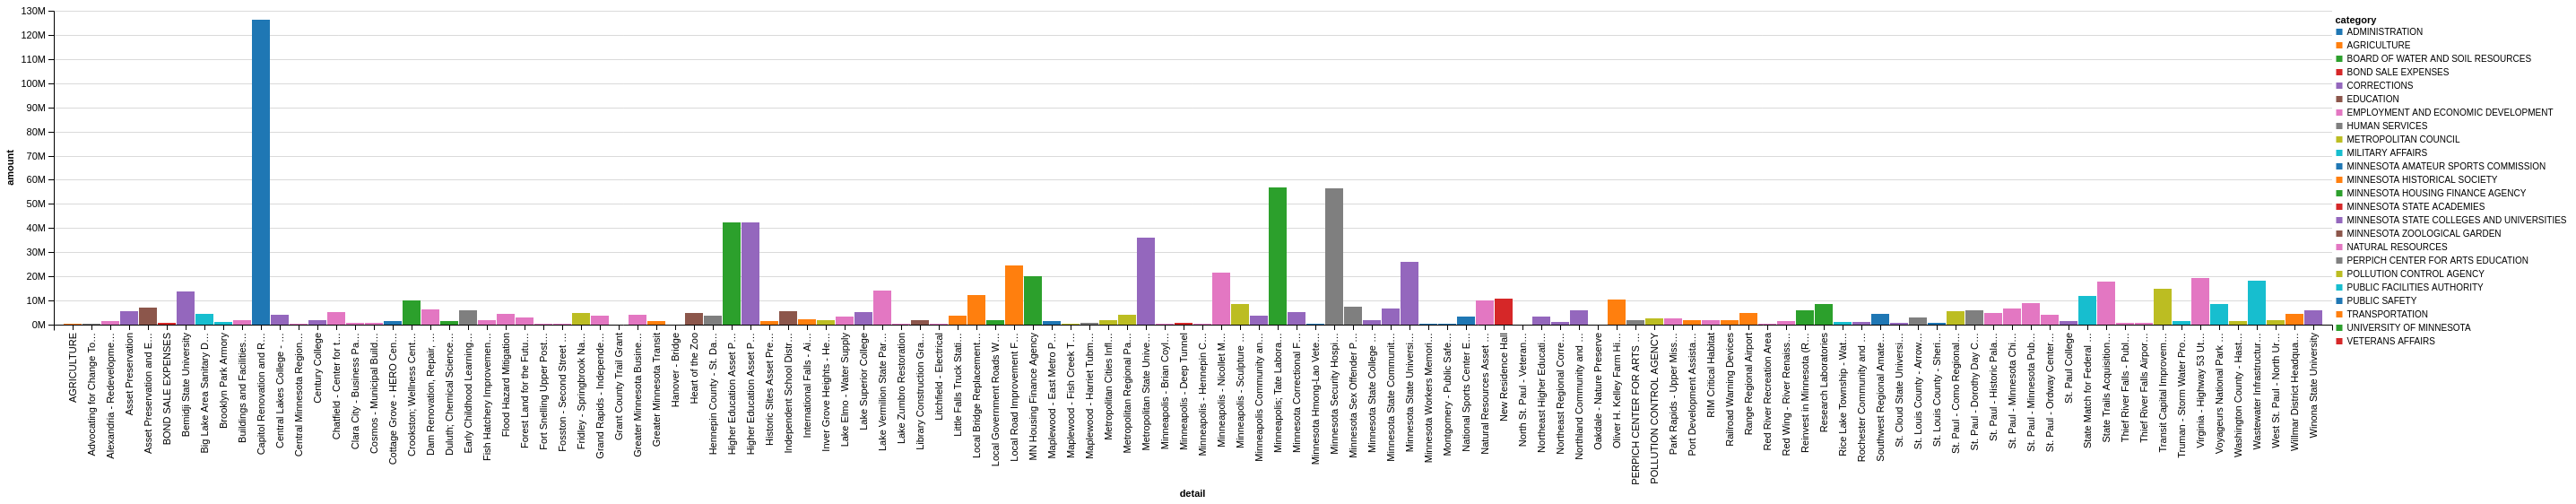

In [12]:
Chart(budget).mark_bar().encode(
    x='detail',
    y='amount',
    color='category')

Filter data to only amounts >= $10M

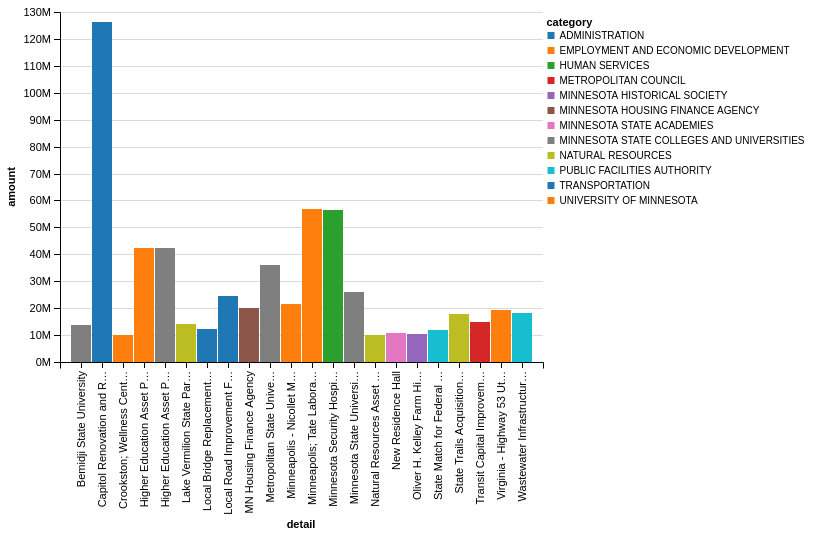

In [13]:
Chart(budget).mark_bar().encode(
    x='detail:N',
    y='amount:Q',
    color='category').transform_data(
      filter='datum.amount >= 10000000',
        )

Swap X and Y in order to see it as a horizontal bar chart

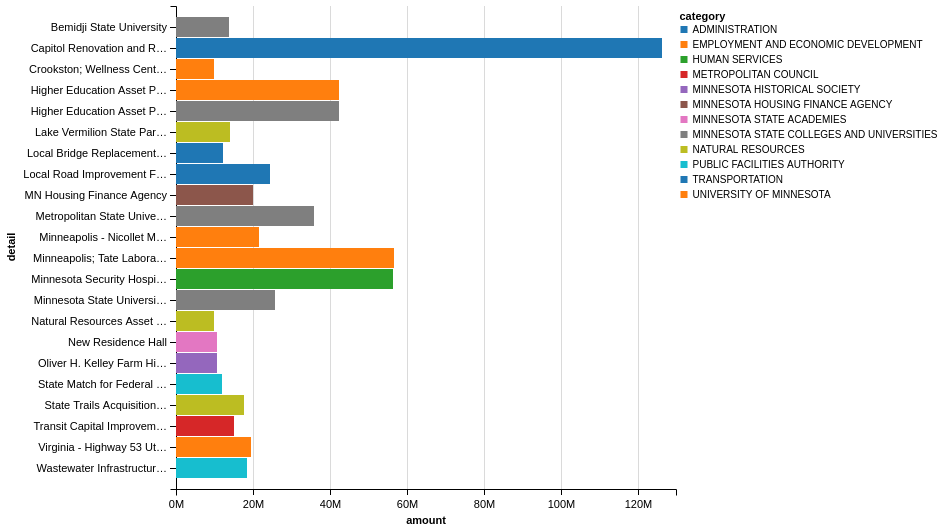

In [14]:
Chart(budget).mark_bar().encode(
    y='detail:N',
    x='amount:Q',
    color='category').transform_data(
      filter='datum.amount >= 10000000',
        )

Equivalent approach using X and Y classes

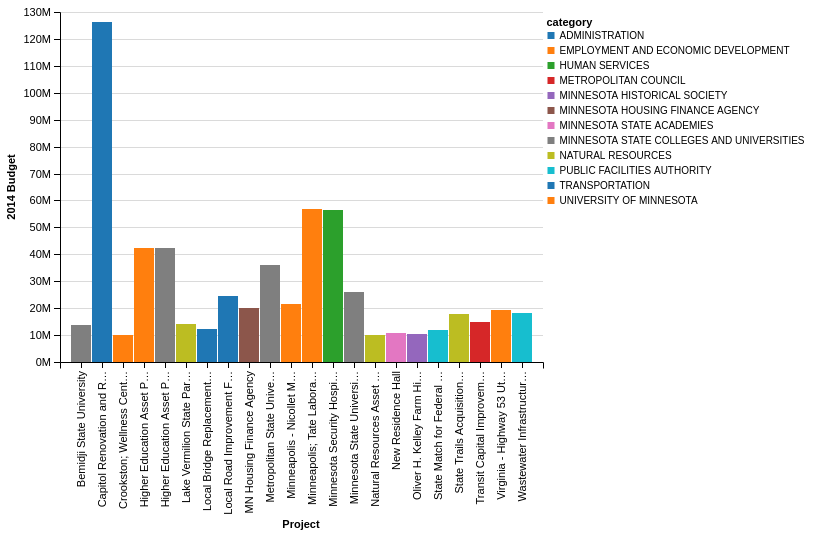

In [15]:
Chart(budget).mark_bar().encode(
    x=X('detail:O',
        axis=Axis(title='Project')),
    y=Y('amount:Q',
        axis=Axis(title='2014 Budget')),
    color='category').transform_data(
      filter='datum.amount >= 10000000',
        )

Order the projects based on their total spend

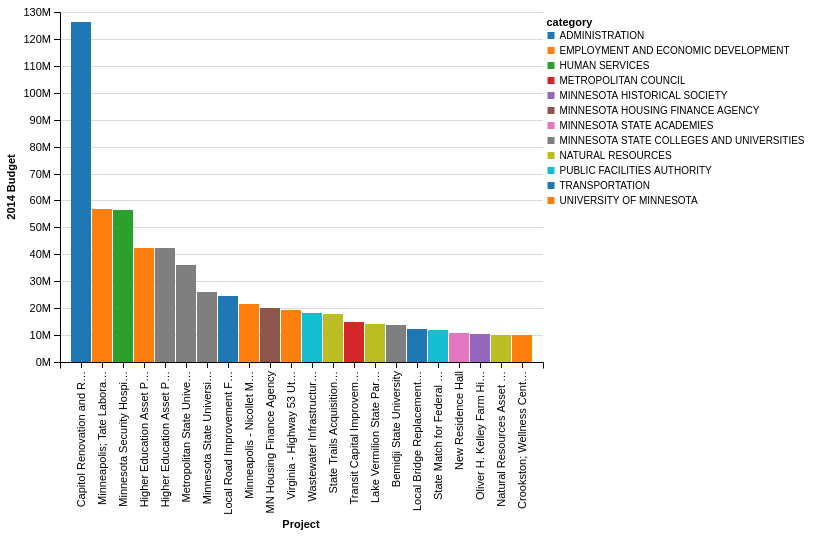

In [16]:
Chart(budget).mark_bar().encode(
    x=X('detail:O', sort=SortField(field='amount', order='descending', op='sum'),
        axis=Axis(title='Project')),
    y=Y('amount:Q',
        axis=Axis(title='2014 Budget')),
    color='category').transform_data(
      filter='datum.amount >= 10000000',
        )

Summarize the data at the category level

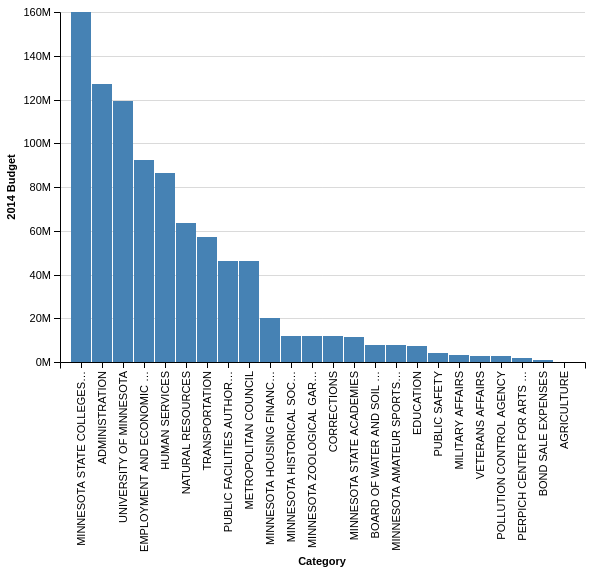

In [17]:
Chart(budget).mark_bar().encode(
    x=X('category', sort=SortField(field='amount', order='descending', op='sum'),
        axis=Axis(title='Category')),
    y=Y('sum(amount)',
        axis=Axis(title='2014 Budget')))

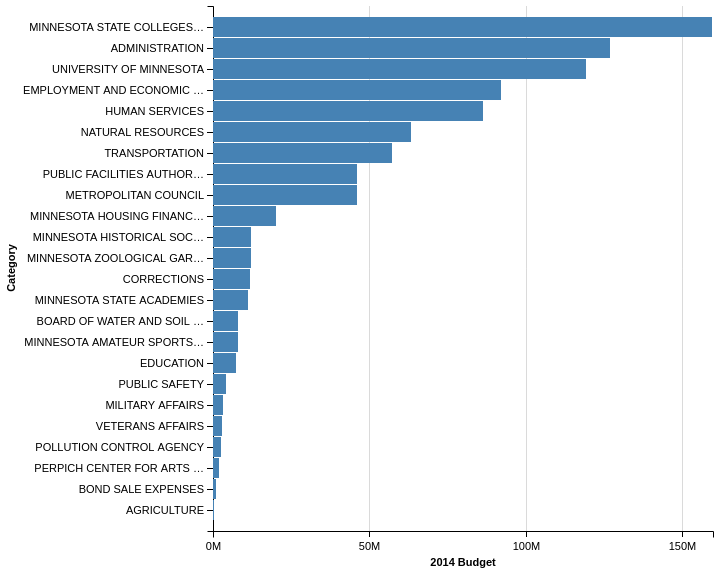

In [18]:
c = Chart(budget).mark_bar().encode(
    y=Y('category', sort=SortField(field='amount', order='descending', op='sum'),
        axis=Axis(title='Category')),
    x=X('sum(amount)',
        axis=Axis(title='2014 Budget')))
c

In [19]:
c.to_dict(data=False)

{'encoding': {'x': {'aggregate': 'sum',
   'axis': {'title': '2014 Budget'},
   'field': 'amount',
   'type': 'quantitative'},
  'y': {'axis': {'title': 'Category'},
   'field': 'category',
   'sort': {'field': 'amount', 'op': 'sum', 'order': 'descending'},
   'type': 'nominal'}},
 'mark': 'bar'}